## PJM Data from Kaggle

## Weather Data from NOAA
You'll need to get an API key from NOAA to download the weather data. See 00a_get_noaa_data.ipynb for more details.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_palette("husl")

# Notebook-wide settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

def load_data():
    """
    Load both PJM and weather datasets
    """
    # Load PJM data
    # Acquire data or change path to where you have it stored   
    pjm_path = '../data/raw/pjm_dataset/pjm_hourly_est.csv'
    df_pjm = pd.read_csv(pjm_path, parse_dates=['Datetime'])
    
    # Load weather data
    # Acquire data or change path to where you have it stored
    weather_path = '../data/raw/weather/noaa_data.csv'
    df_weather = pd.read_csv(weather_path, parse_dates=['timestamp'])
    
    return df_pjm, df_weather

# Load datasets
df_pjm, df_weather = load_data()

# Display basic information
print("PJM Dataset Shape:", df_pjm.shape)
print("\nWeather Dataset Shape:", df_weather.shape)


PJM Dataset Shape: (178262, 13)

Weather Dataset Shape: (148993, 31)


In [24]:
from utils.feature_engineering import merge_data

df_demo = merge_data(df_pjm, df_weather)

df_demo.head()


/Users/henrykobutra/Code/hcc/airef/energyblitz/ml/notebooks/utils/feature_engineering.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PJME"].fillna(method="ffill", inplace=True)
/Users/henrykobutra/Code/hcc/airef/energyblitz/ml/notebooks/utils/feature_engineering.py:53: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["PJME"].fillna(method="ffill", inplace=True)
/Users/henrykobutra/Code/hcc/airef/energyblitz/ml/notebooks/utils/fea

,timestamp,PJME,PJMW,avg_wind_speed,precipitation,avg_temperature,max_temperature,min_temperature,temperature,avg_wind_speed_chicago,precipitation_chicago,avg_temperature_chicago,max_temperature_chicago,min_temperature_chicago,temperature_chicago,avg_wind_speed_washington,precipitation_washington,avg_temperature_washington,max_temperature_washington,min_temperature_washington,temperature_washington,avg_wind_speed_pittsburgh,precipitation_pittsburgh,avg_temperature_pittsburgh,max_temperature_pittsburgh,min_temperature_pittsburgh,temperature_pittsburgh,avg_wind_speed_columbus,precipitation_columbus,avg_temperature_columbus,max_temperature_columbus,min_temperature_columbus,temperature_columbus,year
0,2002-01-01 00:00:00,NaN,NaN,15.0000,0.0,-8.400000,3.300000,-20.100000,-20.100000,5.500000,0.0,-19.500000,-9.750000,-30.500000,-29.875000,11.600000,0.0,-5.600000,2.200000,-13.400000,-13.400000,3.9,0.0,-12.450000,-6.600000,-19.200000,-18.750000,1.300000,0.0,-7.800000,-3.300000,-12.800000,-12.550000,2002
5249,2002-01-01 01:00:00,30393.0,5038.0,14.8375,0.0,-8.782181,3.523102,-20.994105,-20.623083,5.489583,0.0,-18.824274,-8.475073,-30.380094,-29.403586,11.391667,0.0,-5.717207,2.577975,-13.958670,-13.703793,3.8,0.0,-12.327301,-6.525640,-18.867628,-18.288024,1.279167,0.0,-7.666619,-3.142229,-12.660970,-12.263817,2002
5250,2002-01-01 02:00:00,29265.0,5038.0,14.6750,0.0,-9.111362,3.736495,-21.785040,-20.162511,5.479167,0.0,-18.207531,-7.309065,-30.269049,-28.149496,11.183333,0.0,-5.809699,2.929521,-14.446788,-13.333862,3.7,0.0,-12.206891,-6.442489,-18.562051,-17.454815,1.258333,0.0,-7.540247,-2.992004,-12.529265,-11.670002,2002
5251,2002-01-01 03:00:00,28357.0,5038.0,14.5125,0.0,-9.389349,3.940488,-22.476271,-18.729084,5.468750,0.0,-17.647642,-6.248165,-30.166462,-26.104037,10.975000,0.0,-5.878371,3.255440,-14.866759,-12.285536,3.6,0.0,-12.088725,-6.350996,-18.282295,-16.307077,1.237500,0.0,-7.420671,-2.849078,-12.404694,-10.799091,2002
5252,2002-01-01 04:00:00,27899.0,5038.0,14.3500,0.0,-9.617949,4.135390,-23.071265,-16.419612,5.458333,0.0,-17.142476,-5.288562,-30.071927,-23.338317,10.766667,0.0,-5.924115,3.556534,-15.220984,-10.618494,3.5,0.0,-11.972763,-6.251611,-18.027389,-14.916707,1.216667,0.0,-7.307676,-2.713207,-12.287067,-9.701141,2002


In [25]:
from datetime import datetime

# Filter data for a specific date range
start_date = datetime(2017, 7, 1)
end_date = datetime(2018, 7, 1)

df_demo = df_demo[(df_demo['timestamp'] >= start_date) & (df_demo['timestamp'] < end_date)]


In [26]:

from utils.feature_engineering import create_temporal_features, create_lag_features, create_weather_features, create_interaction_features, create_holiday_features, create_consumption_features, prepare_final_features

# Use feature engineering functions defined in the feature engineering notebook
df_features = create_temporal_features(df_demo)
df_features = create_lag_features(df_features)
df_features = create_weather_features(df_features)
df_features = create_interaction_features(df_features)
df_features = create_holiday_features(df_features)
df_features = create_consumption_features(df_features)
df_unscaled_features = df_features
df_features, scaler = prepare_final_features(df_features)

df_features.head()


/Users/henrykobutra/Code/hcc/airef/energyblitz/ml/notebooks/utils/feature_engineering.py:374: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[trend_cols] = df[trend_cols].fillna(method="ffill")


Dropping 18 highly correlated features: ['max_temperature_washington', 'min_temperature_washington', 'avg_temperature_columbus', 'max_temperature_columbus', 'temperature_columbus', 'week_of_year', 'PJMW_lag_2h', 'PJMW_lag_3h', 'PJME_same_hour_1d', 'PJMW_same_hour_1d', 'PJME_rolling_mean_6h', 'PJMW_rolling_mean_6h', 'PJMW_rolling_mean_12h', 'PJMW_rolling_mean_24h', 'temp_change_columbus', 'is_christmas_season', 'ma_24h', 'hour_of_week']


,avg_wind_speed,precipitation,avg_temperature,max_temperature,min_temperature,temperature,avg_wind_speed_chicago,precipitation_chicago,avg_temperature_chicago,max_temperature_chicago,min_temperature_chicago,temperature_chicago,avg_wind_speed_washington,precipitation_washington,avg_temperature_washington,temperature_washington,avg_wind_speed_pittsburgh,precipitation_pittsburgh,avg_temperature_pittsburgh,max_temperature_pittsburgh,min_temperature_pittsburgh,temperature_pittsburgh,avg_wind_speed_columbus,precipitation_columbus,min_temperature_columbus,year,hour,day,month,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,is_morning,is_afternoon,is_evening,is_night,is_weekend,PJME_lag_1h,PJMW_lag_1h,PJME_lag_2h,PJME_lag_3h,PJME_lag_6h,PJMW_lag_6h,PJME_lag_12h,PJMW_lag_12h,PJME_lag_24h,PJMW_lag_24h,PJME_lag_48h,PJMW_lag_48h,PJME_lag_72h,PJMW_lag_72h,PJME_lag_96h,PJMW_lag_96h,PJME_lag_120h,PJMW_lag_120h,PJME_lag_144h,PJMW_lag_144h,PJME_rolling_std_6h,PJMW_rolling_std_6h,PJME_rolling_mean_12h,PJME_rolling_std_12h,PJMW_rolling_std_12h,PJME_rolling_mean_24h,PJME_rolling_std_24h,PJMW_rolling_std_24h,temp_avg,temp_change_chicago,temp_change_24h_chicago,temp_extreme_cold_chicago,temp_extreme_hot_chicago,temp_change_washington,temp_change_24h_washington,temp_extreme_cold_washington,temp_extreme_hot_washington,temp_change_pittsburgh,temp_change_24h_pittsburgh,temp_extreme_cold_pittsburgh,temp_extreme_hot_pittsburgh,temp_change_24h_columbus,temp_extreme_cold_columbus,temp_extreme_hot_columbus,temp_spread,wind_speed_avg,precipitation_avg,weather_severity,temp_hour_sin,temp_hour_cos,temp_month_sin,temp_month_cos,severity_weekend,severity_hour,temp_morning,temp_afternoon,temp_evening,temp_night,temp_change_morning,temp_change_afternoon,is_holiday,is_thanksgiving_season,is_summer_holiday,is_day_before_holiday,is_day_after_holiday,trend_signal,is_peak_hour,is_peak_hour_of_week,consumption_change_rate,consumption_change_rate_24h,weekly_seasonality,PJME,PJMW
30344,-0.856059,-0.512544,-0.380590,-0.648732,-0.041265,-0.516634,0.585427,-0.345282,-0.944268,-0.550470,-0.834810,-1.335507,-1.102563,-0.430066,1.785543,1.767482,0.012627,-0.552522,-0.781932,-1.163640,-0.549144,-0.900184,-0.407796,-0.504911,-0.857118,-2.519898,1.193245,-1.084177,2.342798,-0.036580,-1.230647,0.618844,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,1.177215,0.998123,-0.899019,-0.905679,-0.367422,-0.069447,-1.521893,-0.928142,-0.256026,-0.260008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.014927,2.727931,-0.026944,2.402803,1.911412,-0.462827,1.891732,1.424573,-0.504481,-1.252601,-3.166100,-0.334697,-0.334697,-0.425608,-0.075409,-0.334697,3.116172,-0.661919,-0.181909,-0.334697,-0.334697,-0.944995,2.98778,-0.334697,4.151939,-0.279793,-0.677667,0.954603,-0.166435,0.158466,-0.635598,0.426296,-0.302835,1.713416,-0.333378,-0.331019,0.120817,-0.270474,-0.455628,0.327083,-0.123609,0.0,-0.058222,-0.142723,-0.104241,-0.943835,-0.33978,-0.361868,-0.195835,1.670442,-1.05715,36099.0,6846.0
30345,-0.916409,-0.512544,-0.392632,-0.662767,-0.055480,-0.605285,0.585427,-0.343097,-0.935625,-0.531920,-0.829107,-1.489985,-1.131144,-0.430066,1.777706,1.715130,-0.036260,-0.552522,-0.807713,-1.170430,-0.563402,-0.986778,-0.477762,-0.504911,-0.867430,-2.519898,1.332365,-1.084177,2.342798,-0.036580,-1.005370,0.912216,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,1.101550,0.984270,1.177228,-0.898930,-0.687009,-0.368019,-1.576672,-0.819325,-0.612008,-0.493092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.272339,3.074604,0.221224,1.899903,1.670822,-0.381921,2.172356,1.726501,-0.625623,-1.082206,-3.380242,2.987780,-0.334697,-0.346737,-0.104006,-0.334697,3.116172,-0.597532,-0.283459,-0.334697,-0.334697,-1.096024,2.98778,-0.334697,4.353596,-0.317671,-0.676592,1.749130,-0.031559,0.096459,-0.635598,0.282592,-0.302835,2.979893,-0.333378,-0.331019,-0.143942,-0.270474,-0.455628,0.327083,-0.123609,0.0,-0.058222,-0.142723

In [35]:
df_unscaled_features.head()

,timestamp,PJME,PJMW,avg_wind_speed,precipitation,avg_temperature,max_temperature,min_temperature,temperature,avg_wind_speed_chicago,precipitation_chicago,avg_temperature_chicago,max_temperature_chicago,min_temperature_chicago,temperature_chicago,avg_wind_speed_washington,precipitation_washington,avg_temperature_washington,max_temperature_washington,min_temperature_washington,temperature_washington,avg_wind_speed_pittsburgh,precipitation_pittsburgh,avg_temperature_pittsburgh,max_temperature_pittsburgh,min_temperature_pittsburgh,temperature_pittsburgh,avg_wind_speed_columbus,precipitation_columbus,avg_temperature_columbus,max_temperature_columbus,min_temperature_columbus,temperature_columbus,year,hour,day,month,day_of_week,week_of_year,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,is_morning,is_afternoon,is_evening,is_night,is_weekend,PJME_lag_1h,PJMW_lag_1h,PJME_lag_2h,PJMW_lag_2h,PJME_lag_3h,PJMW_lag_3h,PJME_lag_6h,PJMW_lag_6h,PJME_lag_12h,PJMW_lag_12h,PJME_lag_24h,PJMW_lag_24h,PJME_lag_48h,PJMW_lag_48h,PJME_lag_72h,PJMW_lag_72h,PJME_lag_96h,PJMW_lag_96h,PJME_lag_120h,PJMW_lag_120h,PJME_lag_144h,PJMW_lag_144h,PJME_lag_168h,PJMW_lag_168h,PJME_same_hour_1d,PJME_same_hour_7d,PJMW_same_hour_1d,PJMW_same_hour_7d,PJME_rolling_mean_6h,PJMW_rolling_mean_6h,PJME_rolling_std_6h,PJMW_rolling_std_6h,PJME_rolling_mean_12h,PJMW_rolling_mean_12h,PJME_rolling_std_12h,PJMW_rolling_std_12h,PJME_rolling_mean_24h,PJMW_rolling_mean_24h,PJME_rolling_std_24h,PJMW_rolling_std_24h,PJME_rolling_mean_168h,PJMW_rolling_mean_168h,PJME_rolling_std_168h,PJMW_rolling_std_168h,temp_avg,temp_change_chicago,temp_change_24h_chicago,temp_extreme_cold_chicago,temp_extreme_hot_chicago,temp_change_washington,temp_change_24h_washington,temp_extreme_cold_washington,temp_extreme_hot_washington,temp_change_pittsburgh,temp_change_24h_pittsburgh,temp_extreme_cold_pittsburgh,temp_extreme_hot_pittsburgh,temp_change_columbus,temp_change_24h_columbus,temp_extreme_cold_columbus,temp_extreme_hot_columbus,temp_spread,wind_speed_avg,precipitation_avg,weather_severity,temp_hour_sin,temp_hour_cos,temp_month_sin,temp_month_cos,severity_weekend,severity_hour,temp_morning,temp_afternoon,temp_evening,temp_night,temp_change_morning,temp_change_afternoon,is_holiday,is_christmas_season,is_thanksgiving_season,is_summer_holiday,is_day_before_holiday,is_day_after_holiday,ma_24h,ma_168h,trend_signal,hour_of_week,is_peak_hour,is_peak_hour_of_week,consumption_change_rate,consumption_change_rate_24h,weekly_seasonality
30366,2017-12-03 23:00:00,29472.0,5684.0,3.3250,0.0000,16.443527,36.119920,-0.384147,-1.186584,23.770833,9.822917,32.396791,46.160736,16.683001,18.160138,4.183333,0.066667,50.897737,26.548538,4.229495,40.118468,3.7875,0.0000,8.090252,22.463386,-1.498693,-3.482543,3.754167,0.287500,6.869159,15.585421,1.009094,-0.170666,2017,23,3,12,6,48,-0.258819,0.965926,-0.781831,0.62349,-2.449294e-16,1.0,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.655023,NaN,NaN,False,False,NaN,NaN,False,True,NaN,NaN,False,False,NaN,NaN,False,False,43.601011,8.873958,2.544271,1,-4.051818,15.121591,-3.834375e-15,15.655023,1,23,0.0,0.0,0.0,15.655023,NaN,NaN,False,True,False,False,False,False,NaN,NaN,0,167,False,False,NaN,NaN,NaN
30367,2017-12-04 00:00:00,27734.0,5466.0,3.3000,0.0000,16.800000,36.600000,0.000000,-1.500000,24.500000,10.250000,32.500000,45.750000,16.750000,18.000000,4.200000,0.000000,50.790464,26.600000,4.400000,39.690464,3.9000,0.0000,8.400000,22.500000,-1.500000,-3.600000,3.900000,0.300000,7.100000,15.600000,1.100000,-0.150000,2017,0,4,12,0,49,0.000000,1.000000,0.000000,1.00000,-2.449294e-16,1.0,False,False,False,True,False,29472.0,5684.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.472616,-

In [27]:
import joblib

# Load model metadata to get required features
metadata = joblib.load('../models/model_metadata.joblib')

# Extract required features for 24-hour prediction
required_features = metadata['24h']['xgboost']['features']

# add is_christmas_season FALSE to all rows if you must
df_features['is_christmas_season'] = False

print("Required features:")
print(required_features)

print("Dataset columns:")
print(df_features.columns)

# Check for missing features
missing_features = set(required_features) - set(df_features.columns)
print("Missing Features:", missing_features)


Required features:
['avg_wind_speed', 'precipitation', 'avg_temperature', 'max_temperature', 'min_temperature', 'temperature', 'avg_wind_speed_chicago', 'precipitation_chicago', 'avg_temperature_chicago', 'temperature_chicago', 'avg_wind_speed_washington', 'precipitation_washington', 'avg_temperature_washington', 'temperature_washington', 'avg_wind_speed_pittsburgh', 'precipitation_pittsburgh', 'avg_temperature_pittsburgh', 'temperature_pittsburgh', 'avg_wind_speed_columbus', 'precipitation_columbus', 'year', 'hour', 'day', 'month', 'day_of_week', 'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'is_morning', 'is_afternoon', 'is_evening', 'is_night', 'is_weekend', 'PJME_lag_24h', 'PJMW_lag_24h', 'PJME_lag_48h', 'PJMW_lag_48h', 'PJME_lag_72h', 'PJMW_lag_72h', 'PJME_lag_96h', 'PJMW_lag_96h', 'PJME_lag_120h', 'PJMW_lag_120h', 'PJME_lag_144h', 'PJMW_lag_144h', 'temp_change_chicago', 'temp_change_24h_chicago', 'temp_extreme_cold_chicago', 'temp_extreme

In [28]:
X_demo = df_features[required_features]

X_demo.head()


,avg_wind_speed,precipitation,avg_temperature,max_temperature,min_temperature,temperature,avg_wind_speed_chicago,precipitation_chicago,avg_temperature_chicago,temperature_chicago,avg_wind_speed_washington,precipitation_washington,avg_temperature_washington,temperature_washington,avg_wind_speed_pittsburgh,precipitation_pittsburgh,avg_temperature_pittsburgh,temperature_pittsburgh,avg_wind_speed_columbus,precipitation_columbus,year,hour,day,month,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,is_morning,is_afternoon,is_evening,is_night,is_weekend,PJME_lag_24h,PJMW_lag_24h,PJME_lag_48h,PJMW_lag_48h,PJME_lag_72h,PJMW_lag_72h,PJME_lag_96h,PJMW_lag_96h,PJME_lag_120h,PJMW_lag_120h,PJME_lag_144h,PJMW_lag_144h,temp_change_chicago,temp_change_24h_chicago,temp_extreme_cold_chicago,temp_extreme_hot_chicago,temp_change_washington,temp_change_24h_washington,temp_extreme_cold_washington,temp_extreme_hot_washington,temp_change_pittsburgh,temp_change_24h_pittsburgh,temp_extreme_cold_pittsburgh,temp_extreme_hot_pittsburgh,temp_change_24h_columbus,temp_extreme_cold_columbus,temp_extreme_hot_columbus,temp_spread,wind_speed_avg,precipitation_avg,weather_severity,temp_hour_sin,temp_hour_cos,temp_month_sin,temp_month_cos,severity_weekend,severity_hour,temp_morning,temp_afternoon,temp_evening,temp_night,temp_change_afternoon,is_holiday,is_christmas_season,is_thanksgiving_season,is_summer_holiday,is_day_before_holiday,is_day_after_holiday,trend_signal,is_peak_hour,is_peak_hour_of_week,consumption_change_rate_24h,weekly_seasonality
30344,-0.856059,-0.512544,-0.380590,-0.648732,-0.041265,-0.516634,0.585427,-0.345282,-0.944268,-1.335507,-1.102563,-0.430066,1.785543,1.767482,0.012627,-0.552522,-0.781932,-0.900184,-0.407796,-0.504911,-2.519898,1.193245,-1.084177,2.342798,-0.036580,-1.230647,0.618844,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,-0.256026,-0.260008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.252601,-3.166100,-0.334697,-0.334697,-0.425608,-0.075409,-0.334697,3.116172,-0.661919,-0.181909,-0.334697,-0.334697,-0.944995,2.98778,-0.334697,4.151939,-0.279793,-0.677667,0.954603,-0.166435,0.158466,-0.635598,0.426296,-0.302835,1.713416,-0.333378,-0.331019,0.120817,-0.270474,0.327083,-0.123609,False,0.0,-0.058222,-0.142723,-0.104241,-0.943835,-0.33978,-0.361868,1.670442,-1.05715
30345,-0.916409,-0.512544,-0.392632,-0.662767,-0.055480,-0.605285,0.585427,-0.343097,-0.935625,-1.489985,-1.131144,-0.430066,1.777706,1.715130,-0.036260,-0.552522,-0.807713,-0.986778,-0.477762,-0.504911,-2.519898,1.332365,-1.084177,2.342798,-0.036580,-1.005370,0.912216,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,-0.612008,-0.493092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.082206,-3.380242,2.987780,-0.334697,-0.346737,-0.104006,-0.334697,3.116172,-0.597532,-0.283459,-0.334697,-0.334697,-1.096024,2.98778,-0.334697,4.353596,-0.317671,-0.676592,1.749130,-0.031559,0.096459,-0.635598,0.282592,-0.302835,2.979893,-0.333378,-0.331019,-0.143942,-0.270474,0.327083,-0.123609,False,0.0,-0.058222,-0.142723,-0.104241,-0.943835,-0.33978,-0.361868,2.078600,-1.05715
30346,-0.976759,-0.512544,-0.404831,-0.677461,-0.069683,-0.675393,0.585427,-0.340913,-0.925305,-1.606804,-1.159726,-0.430066,1.769870,1.676619,-0.085147,-0.552522,-0.831417,-1.060227,-0.547728,-0.504911,-2.519898,1.471485,-1.084177,2.342798,-0.036580,-0.711784,1.137328,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,-0.454775,1.315881,-0.65954,-0.870495,-0.624603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.820067,-3.612917,2.987780,-0.334697,-0.254948,-0.196891,-0.334697,3.116172,-0.507671,-0.470599,-0.334697,-0.334697,-1.316592,2.98778,-0.334697,4.507599,-0.355548,-0.675516,1.749130,0.033746,0.009327,-0.635598,0.171569,-0.302835,3.145085,-0.333378,-0.331019,-0.211127,-0.361349,0.327083,-0.123609,False,0.0,-0.058222,-0.142723,-0.104241,-0.943835,-0.33978,-0.361868,2.122687,-1.05715
30347,-1.037108,-0.512544,-0.4172

In [29]:
from tensorflow.keras.models import load_model

# Function to load models
def load_models(horizon='24h'):
    base_path = f'../models/{horizon}/'
    models = {
        'random_forest': joblib.load(base_path + 'random_forest.joblib'),
        'xgboost': joblib.load(base_path + 'xgboost.joblib'),
        'lstm': load_model(base_path + 'lstm_model.keras')
    }
    return models

# Load the 24-hour prediction models
models_24h = load_models('24h')
test_24 = models_24h['xgboost']


In [30]:
# Make predictions
y_demo_pred = test_24.predict(X_demo)

# Add predictions to the dataset
df_features['Predicted_PJME'] = y_demo_pred

df_features.head()


,avg_wind_speed,precipitation,avg_temperature,max_temperature,min_temperature,temperature,avg_wind_speed_chicago,precipitation_chicago,avg_temperature_chicago,max_temperature_chicago,min_temperature_chicago,temperature_chicago,avg_wind_speed_washington,precipitation_washington,avg_temperature_washington,temperature_washington,avg_wind_speed_pittsburgh,precipitation_pittsburgh,avg_temperature_pittsburgh,max_temperature_pittsburgh,min_temperature_pittsburgh,temperature_pittsburgh,avg_wind_speed_columbus,precipitation_columbus,min_temperature_columbus,year,hour,day,month,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,is_morning,is_afternoon,is_evening,is_night,is_weekend,PJME_lag_1h,PJMW_lag_1h,PJME_lag_2h,PJME_lag_3h,PJME_lag_6h,PJMW_lag_6h,PJME_lag_12h,PJMW_lag_12h,PJME_lag_24h,PJMW_lag_24h,PJME_lag_48h,PJMW_lag_48h,PJME_lag_72h,PJMW_lag_72h,PJME_lag_96h,PJMW_lag_96h,PJME_lag_120h,PJMW_lag_120h,PJME_lag_144h,PJMW_lag_144h,PJME_rolling_std_6h,PJMW_rolling_std_6h,PJME_rolling_mean_12h,PJME_rolling_std_12h,PJMW_rolling_std_12h,PJME_rolling_mean_24h,PJME_rolling_std_24h,PJMW_rolling_std_24h,temp_avg,temp_change_chicago,temp_change_24h_chicago,temp_extreme_cold_chicago,temp_extreme_hot_chicago,temp_change_washington,temp_change_24h_washington,temp_extreme_cold_washington,temp_extreme_hot_washington,temp_change_pittsburgh,temp_change_24h_pittsburgh,temp_extreme_cold_pittsburgh,temp_extreme_hot_pittsburgh,temp_change_24h_columbus,temp_extreme_cold_columbus,temp_extreme_hot_columbus,temp_spread,wind_speed_avg,precipitation_avg,weather_severity,temp_hour_sin,temp_hour_cos,temp_month_sin,temp_month_cos,severity_weekend,severity_hour,temp_morning,temp_afternoon,temp_evening,temp_night,temp_change_morning,temp_change_afternoon,is_holiday,is_thanksgiving_season,is_summer_holiday,is_day_before_holiday,is_day_after_holiday,trend_signal,is_peak_hour,is_peak_hour_of_week,consumption_change_rate,consumption_change_rate_24h,weekly_seasonality,PJME,PJMW,is_christmas_season,Predicted_PJME
30344,-0.856059,-0.512544,-0.380590,-0.648732,-0.041265,-0.516634,0.585427,-0.345282,-0.944268,-0.550470,-0.834810,-1.335507,-1.102563,-0.430066,1.785543,1.767482,0.012627,-0.552522,-0.781932,-1.163640,-0.549144,-0.900184,-0.407796,-0.504911,-0.857118,-2.519898,1.193245,-1.084177,2.342798,-0.036580,-1.230647,0.618844,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,1.177215,0.998123,-0.899019,-0.905679,-0.367422,-0.069447,-1.521893,-0.928142,-0.256026,-0.260008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.014927,2.727931,-0.026944,2.402803,1.911412,-0.462827,1.891732,1.424573,-0.504481,-1.252601,-3.166100,-0.334697,-0.334697,-0.425608,-0.075409,-0.334697,3.116172,-0.661919,-0.181909,-0.334697,-0.334697,-0.944995,2.98778,-0.334697,4.151939,-0.279793,-0.677667,0.954603,-0.166435,0.158466,-0.635598,0.426296,-0.302835,1.713416,-0.333378,-0.331019,0.120817,-0.270474,-0.455628,0.327083,-0.123609,0.0,-0.058222,-0.142723,-0.104241,-0.943835,-0.33978,-0.361868,-0.195835,1.670442,-1.05715,36099.0,6846.0,False,35082.234375
30345,-0.916409,-0.512544,-0.392632,-0.662767,-0.055480,-0.605285,0.585427,-0.343097,-0.935625,-0.531920,-0.829107,-1.489985,-1.131144,-0.430066,1.777706,1.715130,-0.036260,-0.552522,-0.807713,-1.170430,-0.563402,-0.986778,-0.477762,-0.504911,-0.867430,-2.519898,1.332365,-1.084177,2.342798,-0.036580,-1.005370,0.912216,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,1.101550,0.984270,1.177228,-0.898930,-0.687009,-0.368019,-1.576672,-0.819325,-0.612008,-0.493092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.272339,3.074604,0.221224,1.899903,1.670822,-0.381921,2.172356,1.726501,-0.625623,-1.082206,-3.380242,2.987780,-0.334697,-0.346737,-0.104006,-0.334697,3.116172,-0.597532,-0.283459,-0.334697,-0.334697,-1.096024,2.98778,-0.334697,4.353596,-0.317671,-0.676592,1.749130,-0.031559,0.096459,-0.635598,0.282592,-0.302835,2.979893,-0.333378,-0.331019,-0.143942,-0.27047

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(df_features['PJME'], df_features['Predicted_PJME'])
rmse = np.sqrt(mean_squared_error(df_features['PJME'], df_features['Predicted_PJME']))
r2 = r2_score(df_features['PJME'], df_features['Predicted_PJME'])

# Print metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


MAE: 856.17
RMSE: 1177.22
R2 Score: 0.9421


In [32]:
# Add timestamp back to the dataframe
df_features['timestamp'] = df_demo['timestamp']

df_features.head()


,avg_wind_speed,precipitation,avg_temperature,max_temperature,min_temperature,temperature,avg_wind_speed_chicago,precipitation_chicago,avg_temperature_chicago,max_temperature_chicago,min_temperature_chicago,temperature_chicago,avg_wind_speed_washington,precipitation_washington,avg_temperature_washington,temperature_washington,avg_wind_speed_pittsburgh,precipitation_pittsburgh,avg_temperature_pittsburgh,max_temperature_pittsburgh,min_temperature_pittsburgh,temperature_pittsburgh,avg_wind_speed_columbus,precipitation_columbus,min_temperature_columbus,year,hour,day,month,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,is_morning,is_afternoon,is_evening,is_night,is_weekend,PJME_lag_1h,PJMW_lag_1h,PJME_lag_2h,PJME_lag_3h,PJME_lag_6h,PJMW_lag_6h,PJME_lag_12h,PJMW_lag_12h,PJME_lag_24h,PJMW_lag_24h,PJME_lag_48h,PJMW_lag_48h,PJME_lag_72h,PJMW_lag_72h,PJME_lag_96h,PJMW_lag_96h,PJME_lag_120h,PJMW_lag_120h,PJME_lag_144h,PJMW_lag_144h,PJME_rolling_std_6h,PJMW_rolling_std_6h,PJME_rolling_mean_12h,PJME_rolling_std_12h,PJMW_rolling_std_12h,PJME_rolling_mean_24h,PJME_rolling_std_24h,PJMW_rolling_std_24h,temp_avg,temp_change_chicago,temp_change_24h_chicago,temp_extreme_cold_chicago,temp_extreme_hot_chicago,temp_change_washington,temp_change_24h_washington,temp_extreme_cold_washington,temp_extreme_hot_washington,temp_change_pittsburgh,temp_change_24h_pittsburgh,temp_extreme_cold_pittsburgh,temp_extreme_hot_pittsburgh,temp_change_24h_columbus,temp_extreme_cold_columbus,temp_extreme_hot_columbus,temp_spread,wind_speed_avg,precipitation_avg,weather_severity,temp_hour_sin,temp_hour_cos,temp_month_sin,temp_month_cos,severity_weekend,severity_hour,temp_morning,temp_afternoon,temp_evening,temp_night,temp_change_morning,temp_change_afternoon,is_holiday,is_thanksgiving_season,is_summer_holiday,is_day_before_holiday,is_day_after_holiday,trend_signal,is_peak_hour,is_peak_hour_of_week,consumption_change_rate,consumption_change_rate_24h,weekly_seasonality,PJME,PJMW,is_christmas_season,Predicted_PJME,timestamp
30344,-0.856059,-0.512544,-0.380590,-0.648732,-0.041265,-0.516634,0.585427,-0.345282,-0.944268,-0.550470,-0.834810,-1.335507,-1.102563,-0.430066,1.785543,1.767482,0.012627,-0.552522,-0.781932,-1.163640,-0.549144,-0.900184,-0.407796,-0.504911,-0.857118,-2.519898,1.193245,-1.084177,2.342798,-0.036580,-1.230647,0.618844,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,1.177215,0.998123,-0.899019,-0.905679,-0.367422,-0.069447,-1.521893,-0.928142,-0.256026,-0.260008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.014927,2.727931,-0.026944,2.402803,1.911412,-0.462827,1.891732,1.424573,-0.504481,-1.252601,-3.166100,-0.334697,-0.334697,-0.425608,-0.075409,-0.334697,3.116172,-0.661919,-0.181909,-0.334697,-0.334697,-0.944995,2.98778,-0.334697,4.151939,-0.279793,-0.677667,0.954603,-0.166435,0.158466,-0.635598,0.426296,-0.302835,1.713416,-0.333378,-0.331019,0.120817,-0.270474,-0.455628,0.327083,-0.123609,0.0,-0.058222,-0.142723,-0.104241,-0.943835,-0.33978,-0.361868,-0.195835,1.670442,-1.05715,36099.0,6846.0,False,35082.234375,2017-12-07 20:00:00
30345,-0.916409,-0.512544,-0.392632,-0.662767,-0.055480,-0.605285,0.585427,-0.343097,-0.935625,-0.531920,-0.829107,-1.489985,-1.131144,-0.430066,1.777706,1.715130,-0.036260,-0.552522,-0.807713,-1.170430,-0.563402,-0.986778,-0.477762,-0.504911,-0.867430,-2.519898,1.332365,-1.084177,2.342798,-0.036580,-1.005370,0.912216,0.653621,-1.279129,-1.943765,1.265424,-0.554171,-0.5428,2.198892,-0.759947,-0.65954,1.101550,0.984270,1.177228,-0.898930,-0.687009,-0.368019,-1.576672,-0.819325,-0.612008,-0.493092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.272339,3.074604,0.221224,1.899903,1.670822,-0.381921,2.172356,1.726501,-0.625623,-1.082206,-3.380242,2.987780,-0.334697,-0.346737,-0.104006,-0.334697,3.116172,-0.597532,-0.283459,-0.334697,-0.334697,-1.096024,2.98778,-0.334697,4.353596,-0.317671,-0.676592,1.749130,-0.031559,0.096459,-0.635598,0.282592,-0.302835,2.979893,-0.33337

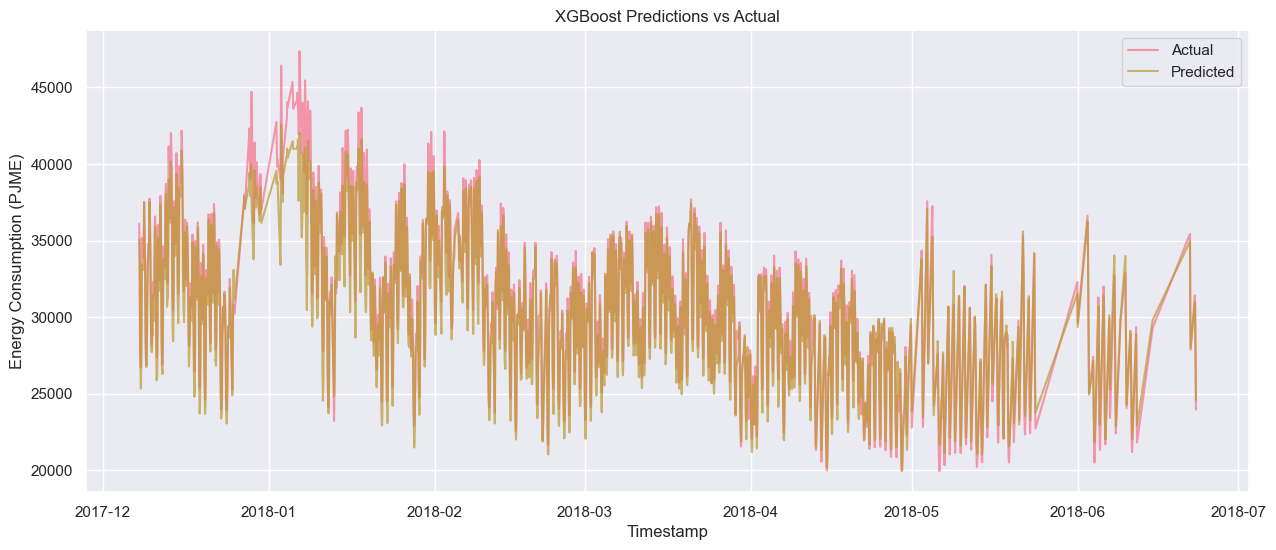

In [33]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(df_features['timestamp'], df_features['PJME'], label='Actual', alpha=0.7)
plt.plot(df_features['timestamp'], df_features['Predicted_PJME'], label='Predicted', alpha=0.7)
plt.title('XGBoost Predictions vs Actual')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (PJME)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
frontend_df = df_features[['timestamp', 'PJME', 'Predicted_PJME']]
frontend_df[['avg_temperature', 'is_holiday']] = df_unscaled_features[['avg_temperature', 'is_holiday']]    

frontend_df.head()

/var/folders/4q/s5v1_r492q5gs7z9s29967280000gp/T/ipykernel_78181/1246288381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontend_df[['avg_temperature', 'is_holiday']] = df_unscaled_features[['avg_temperature', 'is_holiday']]
/var/folders/4q/s5v1_r492q5gs7z9s29967280000gp/T/ipykernel_78181/1246288381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontend_df[['avg_temperature', 'is_holiday']] = df_unscaled_features[['avg_temperature', 'is_holiday']]


,timestamp,PJME,Predicted_PJME,avg_temperature,is_holiday
30344,2017-12-07 20:00:00,36099.0,35082.234375,10.844858,False
30345,2017-12-07 21:00:00,35442.0,34862.957031,10.614054,False
30346,2017-12-07 22:00:00,33981.0,33370.074219,10.380237,False
30347,2017-12-07 23:00:00,31624.0,30692.714844,10.142516,False
30348,2017-12-08 00:00:00,29311.0,27927.466797,9.900000,False


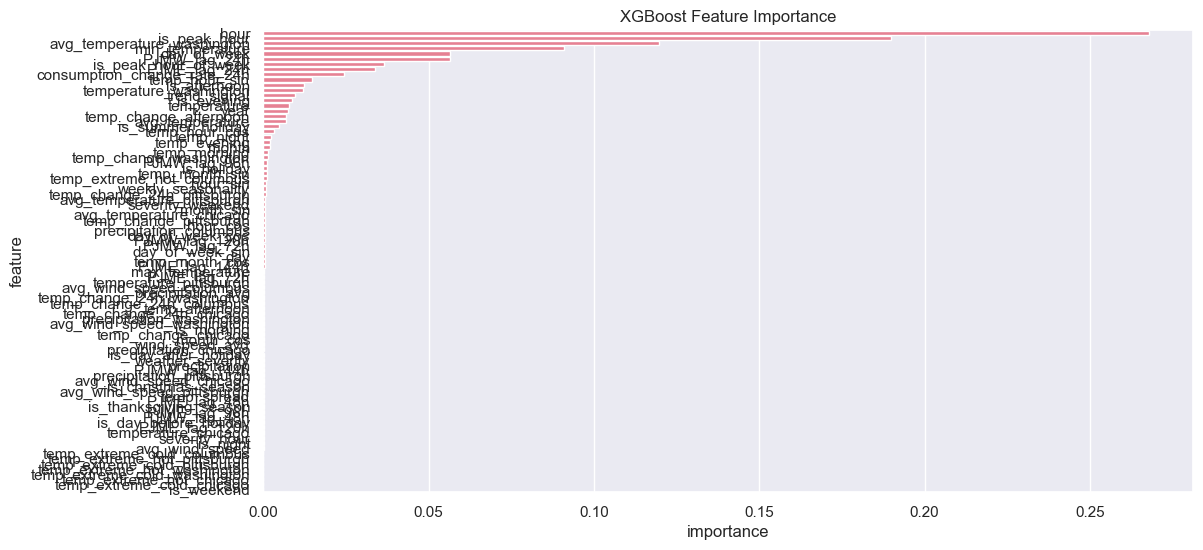

/Users/henrykobutra/Code/hcc/airef/energyblitz/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


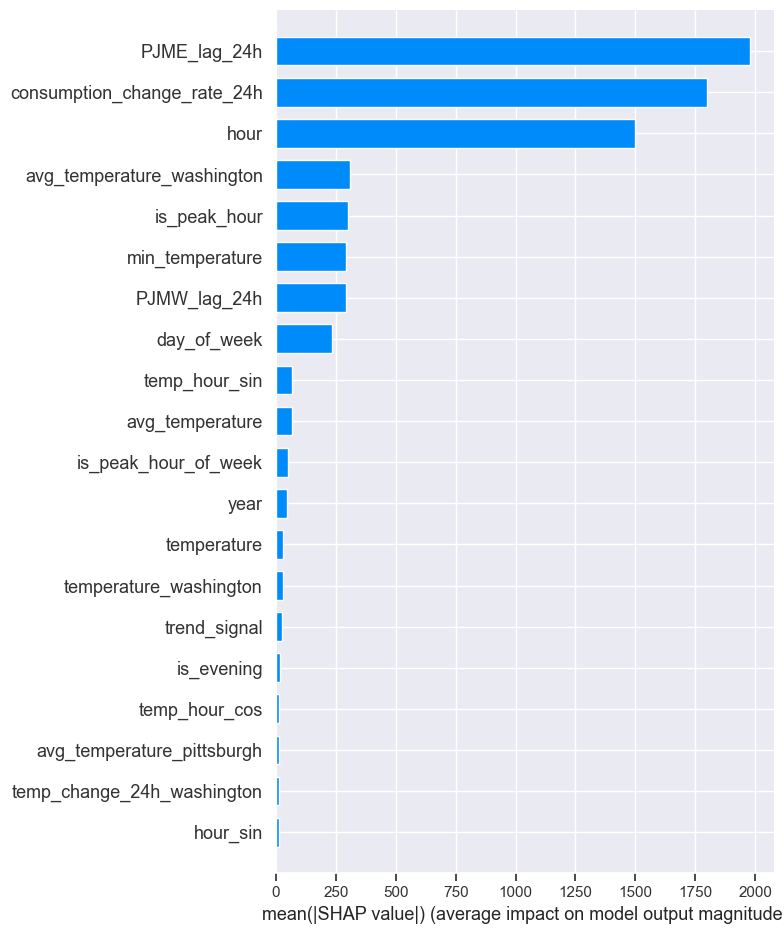

<Figure size 1200x600 with 0 Axes>

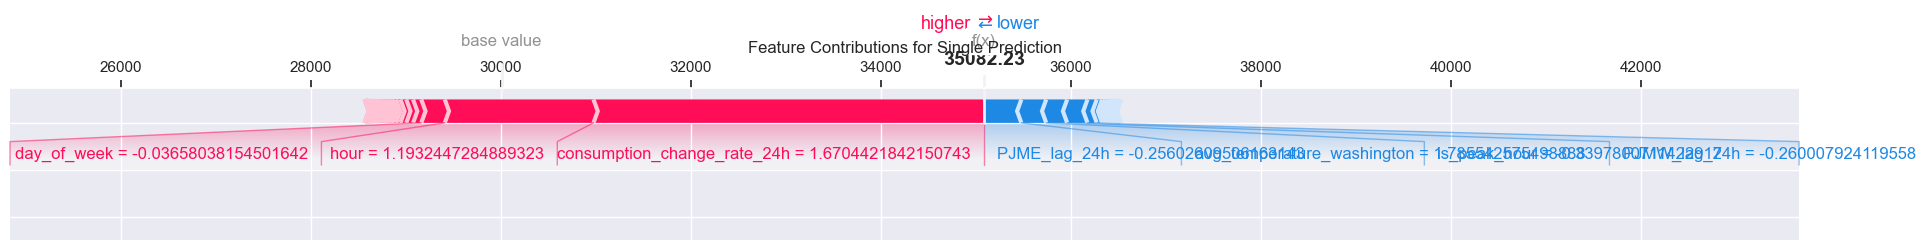

In [39]:
# ... existing code ...

# Add feature importance analysis
feature_importance = pd.DataFrame({
    'feature': required_features,
    'importance': test_24.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('XGBoost Feature Importance')
plt.show()

# For more detailed analysis, we can use SHAP values
import shap

# Create explainer
explainer = shap.TreeExplainer(test_24)
shap_values = explainer.shap_values(X_demo)

# Plot SHAP summary
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_demo, plot_type="bar")
plt.show()

# For a single prediction, we can show individual feature contributions
sample_idx = 0  # Change this to analyze different predictions
plt.figure(figsize=(12, 6))
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx,:],
    X_demo.iloc[sample_idx,:],
    matplotlib=True,
    show=False
)
plt.title('Feature Contributions for Single Prediction')
plt.tight_layout()
plt.show()

In [40]:
# Add SHAP values to the dataframe
explainer = shap.TreeExplainer(test_24)
shap_values = explainer.shap_values(X_demo)

# Create a function to get top contributors
def get_top_contributors(idx, shap_values, feature_names, n_top=5):
    # Get SHAP values for this prediction
    row_shap_values = shap_values[idx]
    # Create (feature, value) pairs
    contributions = list(zip(feature_names, row_shap_values))
    # Sort by absolute value of contribution
    sorted_contributions = sorted(contributions, key=lambda x: abs(x[1]), reverse=True)
    # Format top N contributors
    top_contributors = [
        {
            "feature": feat,
            "contribution": float(val),  # Convert numpy float to Python float for JSON serialization
            "value": float(X_demo.iloc[idx][feat])  # Add the actual feature value
        }
        for feat, val in sorted_contributions[:n_top]
    ]
    return top_contributors

# Add contributors column to the dataframe
frontend_df['contributors'] = [
    get_top_contributors(i, shap_values, required_features) 
    for i in range(len(frontend_df))
]

# Display the updated dataframe
frontend_df.head()

/var/folders/4q/s5v1_r492q5gs7z9s29967280000gp/T/ipykernel_78181/3401400568.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontend_df['contributors'] = [


,timestamp,PJME,Predicted_PJME,avg_temperature,is_holiday,contributors
30344,2017-12-07 20:00:00,36099.0,35082.234375,10.844858,False,"[{'feature': 'consumption_change_rate_24h', 'c..."
30345,2017-12-07 21:00:00,35442.0,34862.957031,10.614054,False,"[{'feature': 'consumption_change_rate_24h', 'c..."
30346,2017-12-07 22:00:00,33981.0,33370.074219,10.380237,False,"[{'feature': 'consumption_change_rate_24h', 'c..."
30347,2017-12-07 23:00:00,31624.0,30692.714844,10.142516,False,"[{'feature': 'consumption_change_rate_24h', 'c..."
30348,2017-12-08 00:00:00,29311.0,27927.466797,9.900000,False,"[{'feature': 'hour', 'contribution': -1854.363..."


In [43]:
import json

# Separate contributors into a reference dictionary
contributors_dict = {}
unique_id = 1

def extract_contributors(row_contributors):
    global unique_id
    ids = []
    for contributor in row_contributors:
        # Convert dict to tuple for hashing
        contributor_key = tuple(sorted(contributor.items()))
        if contributor_key not in contributors_dict:
            contributors_dict[contributor_key] = {"id": unique_id, "feature": contributor["feature"], "contribution": contributor["contribution"]}
            unique_id += 1
        # Add ID to row
        ids.append(contributors_dict[contributor_key]["id"])
    return ids

frontend_df["contributors_ids"] = frontend_df["contributors"].apply(extract_contributors)

# Remove original contributors column
web_df = frontend_df.drop(columns=["contributors"])

web_df['timestamp'] = web_df['timestamp'].apply(lambda x: x.isoformat())

# Save JSON files
# Main data JSON
data_json = web_df.to_dict(orient="records")
with open("../frontend/data.json", "w") as f:
    json.dump(data_json, f, indent=2)

# Contributors JSON
contributors_json = list(contributors_dict.values())
with open("../frontend/contributors.json", "w") as f:
    json.dump(contributors_json, f, indent=2)

print("JSON files created: data.json and contributors.json")

JSON files created: data.json and contributors.json


/var/folders/4q/s5v1_r492q5gs7z9s29967280000gp/T/ipykernel_78181/4125196591.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontend_df["contributors_ids"] = frontend_df["contributors"].apply(extract_contributors)
